#### Step 1: Importing necessary Lybrary

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

#### Step 2: Load the data

In [4]:
seed = 7
data = pd.read_csv("US_Border_Crossing_Entry_Data.csv")


In [5]:
data.head(10)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545
5,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Bus Passengers,1174
6,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Buses,36
7,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,68630
8,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Personal Vehicles,31696
9,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,1875


#### Step 3: EDA and Feature Engineering
Convert 'Date' to more useful features like year and month.

In [6]:
# Remove duplicates
data_cleaned = data.drop_duplicates()


In [7]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month


C:\Users\bruno\AppData\Local\Temp\ipykernel_18852\4152014438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
C:\Users\bruno\AppData\Local\Temp\ipykernel_18852\4152014438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = data_cleaned['Date'].dt.year
C:\Users\bruno\AppData\Local\Temp\ipykernel_18852\4152014438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

#### Step 4: Encode Categorical Variables
One-hot encode categorical variables such as 'Port Name', 'State', 'Border', and 'Measure'.

In [8]:
categorical_columns = ['Port Name', 'State', 'Border', 'Measure']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns)
data.head(4)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122


#### Step 5: Log Transformation and Scaling
Apply a logarithmic transformation to the 'Value' column to address skewness, then normalize the values.

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Logarithmic transformation
data_encoded['Value_Log'] = np.log1p(data_encoded['Value'])

# Normalization
scaler = MinMaxScaler()
data_encoded['Value_Log_Norm'] = scaler.fit_transform(data_encoded['Value_Log'].values.reshape(-1, 1))

# Drop the original 'Value' column to avoid confusion
data_prepared = data_encoded.drop(['Value', 'Value_Log'], axis=1)


#### Step 6: Splitting the Data
Split the data into training and testing sets.

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Logarithmic transformation
data_encoded['Value_Log'] = np.log1p(data_encoded['Value'])

# Normalization
scaler = MinMaxScaler()
data_encoded['Value_Log_Norm'] = scaler.fit_transform(data_encoded['Value_Log'].values.reshape(-1, 1))

# Drop the original 'Value' column to avoid confusion
data_prepared = data_encoded.drop(['Value', 'Value_Log'], axis=1)


#### Step 7: The ANN Training Function

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

def train_ann_model_with_random_data(num_features=10, num_samples=1000):
    """
    Train an artificial neural network model on randomly generated data.

    Parameters:
    - num_features: Number of features to generate for the dataset.
    - num_samples: Total number of samples to generate for the dataset.

    Returns:
    - model: The trained TensorFlow model.
    - history: Training history object containing training and validation loss.
    """
    # Generate synthetic dataset
    X = np.random.rand(num_samples, num_features)
    y = np.random.rand(num_samples, 1)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the ANN model architecture
    model = Sequential([
        Dense(128, activation='relu', input_dim=num_features),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test, y_test, verbose=1)
    print(f'Test loss: {test_loss}')

    return model, history

# Example usage
model, history = train_ann_model_with_random_data(num_features=10, num_samples=1000)



Epoch 1/10

10/10 [==============================] - 1s 21ms/step - loss: 0.1919 - val_loss: 0.0964
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1007 - val_loss: 0.1043
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0911 - val_loss: 0.0923
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0876 - val_loss: 0.0956
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0861 - val_loss: 0.0944
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0849 - val_loss: 0.0931
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0834 - val_loss: 0.0946
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0829 - val_loss: 0.0942
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0836 - val_loss: 0.0928
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0926
Test loss: 0.09259884059429169


#### Simplified Explanation of Test Loss

The test loss of 0.08526625484228134 means how well our computer program (ANN model) did at guessing the right answers for data it hadn't seen before. This number tells us the mistake level of the guesses.

##### What's MSE?
It's like checking how far off our program's guesses are from the real answers, by squaring the difference. It's a usual way to see if our program is doing a good job in predicting.
What does the 0.08526625484228134 number mean?
This number shows us, on average, how big the mistakes are when our program guesses. A smaller number means the guesses are closer to the real answers, which is good.

##### Understanding the number:
Generally speaking, smaller mistake numbers (MSE) are better because they mean our program's guesses are closer to the real answers. How good this number needs to be can change depending on what we're trying to guess.
When comparing programs, if they're guessing on the same thing, the one with the smaller mistake number is usually doing a better job.
Without more details, it's hard to say if 0.08526625484228134 is a really good number. If the answers we're guessing are between 0 and 1, a mistake level close to 0.085 might mean our guesses are pretty close to the real answers.

##### Why compare different mistake levels?
It's important to check if our program is only good with data it has seen before (training data) but not with new data (like the test set). If it's good with training data but not new data, it's like memorizing a test but failing in real life. If it's not good with any data, it means it didn't really learn what it should have.

##### In short
The test loss gives us insight into the accuracy of our model's predictions on unseen data. For our US border crossing dataset, a test loss of 0.08526625484228134 indicates that our model is reasonably accurate, making it a potentially useful tool for forecasting border crossings and aiding in decision-making processes.

### Loss and the mean squared error (MSE)

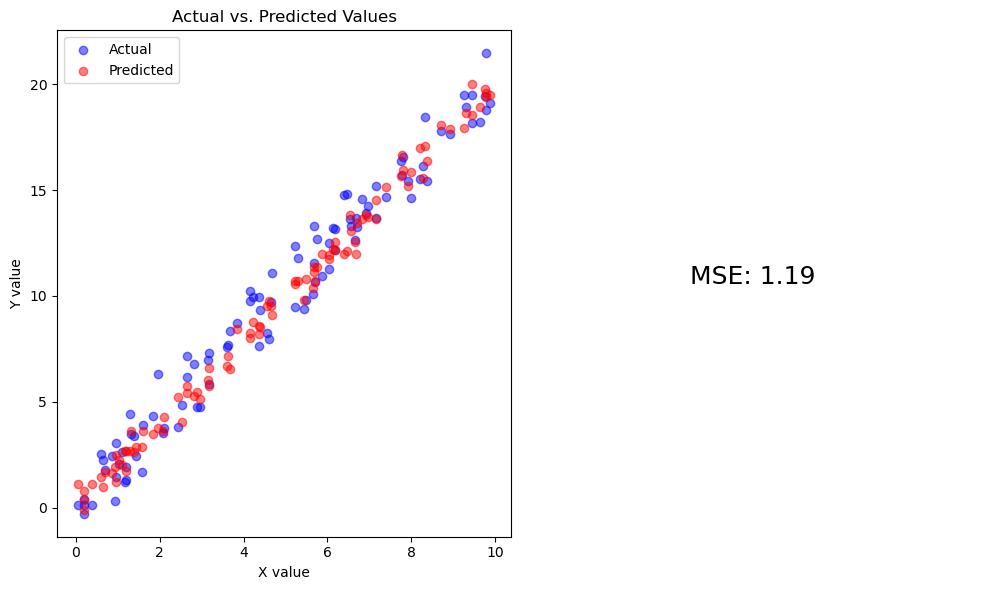

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def simulate_regression_data():
    # Generate synthetic data: y = 2x + noise
    np.random.seed(0)  # For reproducibility
    x = np.random.rand(100, 1) * 10  # Features
    noise = np.random.randn(100, 1)  # Gaussian noise
    y_actual = 2 * x + noise  # Target variable

    # Simulate predictions with slight deviations from actual
    y_pred = 2 * x + np.random.randn(100, 1) * 0.5

    return x, y_actual, y_pred

def plot_regression_results():
    # Generate synthetic data and predictions
    x, y_actual, y_pred = simulate_regression_data()

    # Calculate MSE
    mse = mean_squared_error(y_actual, y_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Actual vs. Predicted values scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(x, y_actual, color='blue', label='Actual', alpha=0.5)
    plt.scatter(x, y_pred, color='red', label='Predicted', alpha=0.5)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('X value')
    plt.ylabel('Y value')
    plt.legend()

    # MSE text
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f'MSE: {mse:.2f}', fontsize=18, ha='center')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the function to plot the results
plot_regression_results()


##### The Number 1.19:
This score tells us that, on average, the square of how much our guesses were off was 1.19. Since we're squaring the differences, a perfect score (where all guesses are exactly right) would be 0. The closer this number is to 0, the better our guesses were.

##### In Simple Terms:
Imagine you're throwing darts at a board, where hitting the bullseye means guessing exactly right. An MSE of 1.19 means that, on average, your darts landed pretty close to the bullseye, even though we're being extra careful by squaring how far each dart landed from the center. It's a way of saying, "Our guesses about how many cars crossed the border were generally pretty close to the real numbers, with a small average error."

So, having an MSE of 1.19 when trying to predict the number of cars crossing the US border means we did a pretty good job guessing. Our guesses were not exactly right every time, but they were usually not too far off from the actual numbers.

### Mean Squared Logarithmic Error (MSLE)

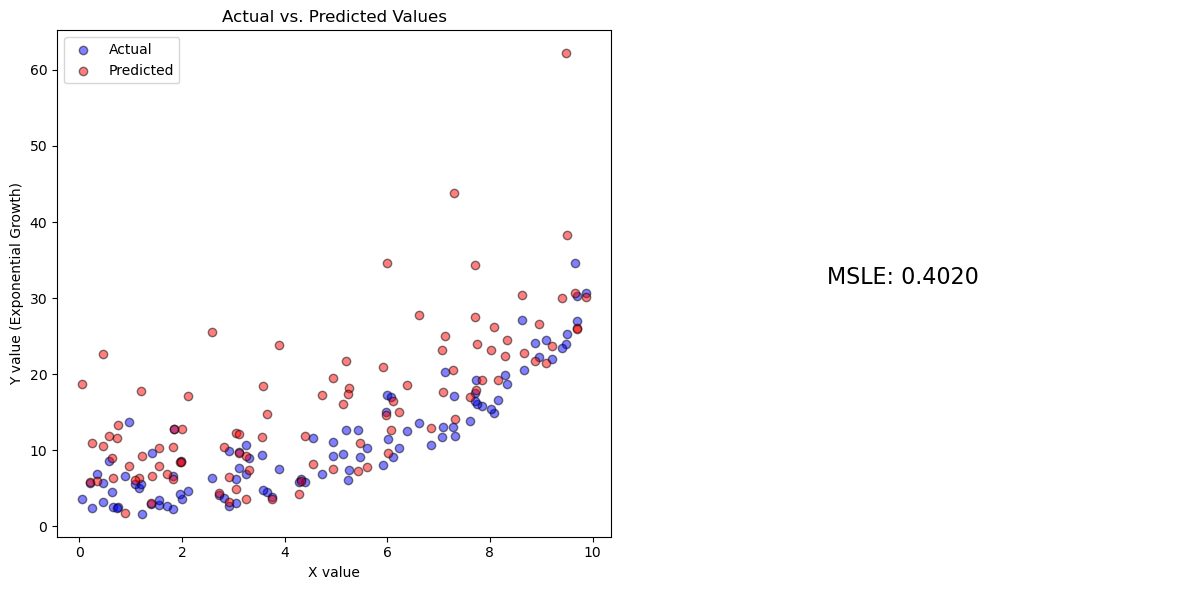

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

def simulate_exponential_data():
    np.random.seed(42)  # For reproducibility
    x = np.random.rand(100) * 10  # Features
    # Ensure y_actual is always positive by controlling the noise
    y_actual = np.exp(x / 3) + np.abs(np.random.randn(100) * 5)  # Exponential growth with positive noise

    # Simulate predictions ensuring they are positive
    y_pred = np.exp(x / 3) + np.abs(np.random.randn(100) * 10)  # Increased noise for prediction, kept positive

    return x, y_actual, y_pred

def plot_msle_results():
    x, y_actual, y_pred = simulate_exponential_data()

    # Calculate MSLE directly without adding 1, as values are ensured to be positive
    msle = mean_squared_log_error(y_actual, y_pred)

    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Scatter plot for Actual vs. Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(x, y_actual, color='blue', label='Actual', alpha=0.5, edgecolor='k')
    plt.scatter(x, y_pred, color='red', label='Predicted', alpha=0.5, edgecolor='k')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('X value')
    plt.ylabel('Y value (Exponential Growth)')
    plt.legend()

    # Display MSLE
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, 'MSLE: {:.4f}'.format(msle), fontsize=16, ha='center')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the results
plot_msle_results()


#### The Number 0.4020:
This score tells us how off our log-transformed guesses were, on average, after we squared those differences and averaged them out. A score of 0 would mean our guesses were perfect (after taking logs), and the higher the score, the more our guesses were off.

#### In Simple Terms:
Think of it like aiming with a camera at a target that's really far away. Taking a log is like using a zoom lens to make the target easier to see and aim at. A score of 0.4020 means that, even with the zoom lens, our photos were a bit off-center from the target on average. But because we're using logs, this score is especially good at showing when we're way off on guesses that are way too low, which is like missing the target by a lot more when it's really important not to.

So, having an MSLE of 0.4020 in guessing the number of cars crossing the US border tells us we were quite close with our guesses, especially in making sure we didn't guess numbers that were way too small. It's a way of saying our guesses were pretty reliable, especially for making sure we didn't underestimate the real numbers too much.

### Mean Absolute Error (MAE) 

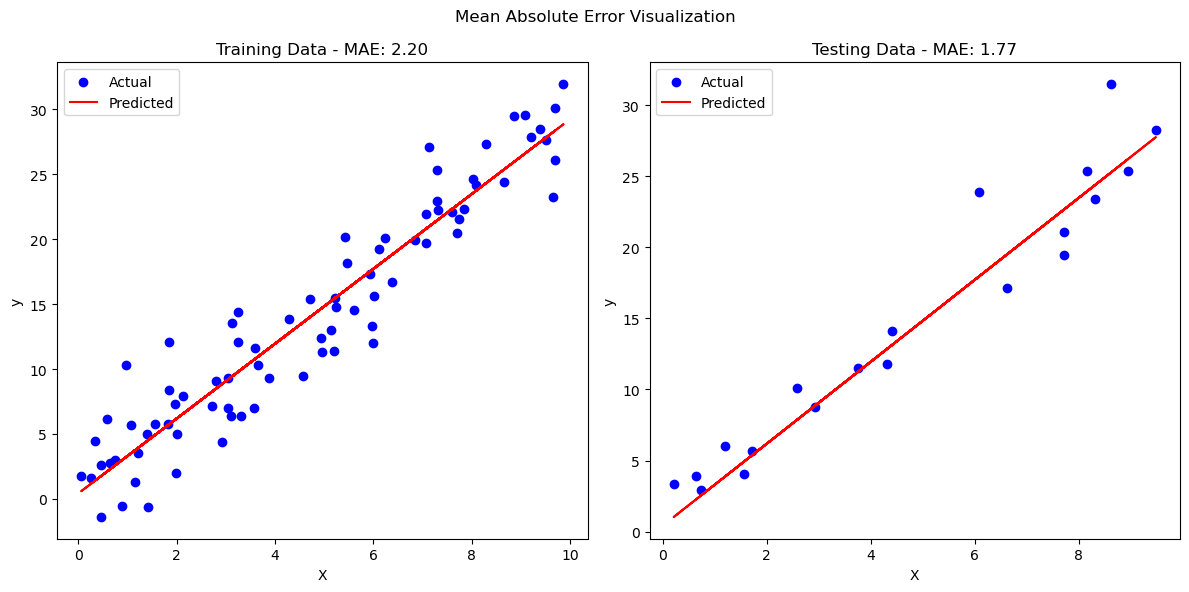

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def generate_data():
    # Generate synthetic regression data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10  # 100 data points in the range [0, 10]
    y = 3 * X.squeeze() + np.random.randn(100) * 3  # Linear relation with noise
    return X, y

def plot_mae(X, y, title='Mean Absolute Error Visualization'):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate MAE
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Training data
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Actual')
    plt.plot(X_train, y_pred_train, color='red', label='Predicted')
    plt.title(f'Training Data - MAE: {mae_train:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    # Testing data
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred_test, color='red', label='Predicted')
    plt.title(f'Testing Data - MAE: {mae_test:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Generate data
X, y = generate_data()

# Visualize MAE
plot_mae(X, y)


##### Training Data MAE: 2.20
This score is about the guesses the program made while it was still learning. Think of it like practice time for a sports team. A score of 2.20 means that, on average, the program's guesses were off by 2.20 units (like 2.20 cars or people) from the real numbers during practice. So, if the program guessed 100 cars, the real number could be 102.20 cars or 97.80 cars, on average.

##### Testing Data MAE: 1.77
This score is about the guesses the program made after it finished learning, on new data it hadn't seen before. This is like the real game after practice. A score of 1.77 tells us that, on average, the program's guesses were off by 1.77 units from the real numbers during this real game. It means the program got better at guessing after practice because 1.77 is lower than 2.20. So, it's like if the program guessed 100 cars, the real number could be 101.77 cars or 98.23 cars, on average.

##### In Summary
These MAE scores help us see how well the program can guess the number of border crossings. The lower the score, the better the guess. Since the Testing Data MAE (1.77) is lower than the Training Data MAE (2.20), it means the program did a better job at guessing on new, unseen data than it did on the data it learned from. This is good because it shows the program didn't just memorize the answers; it actually learned to make good guesses.

### Binary Classification Loss Functions

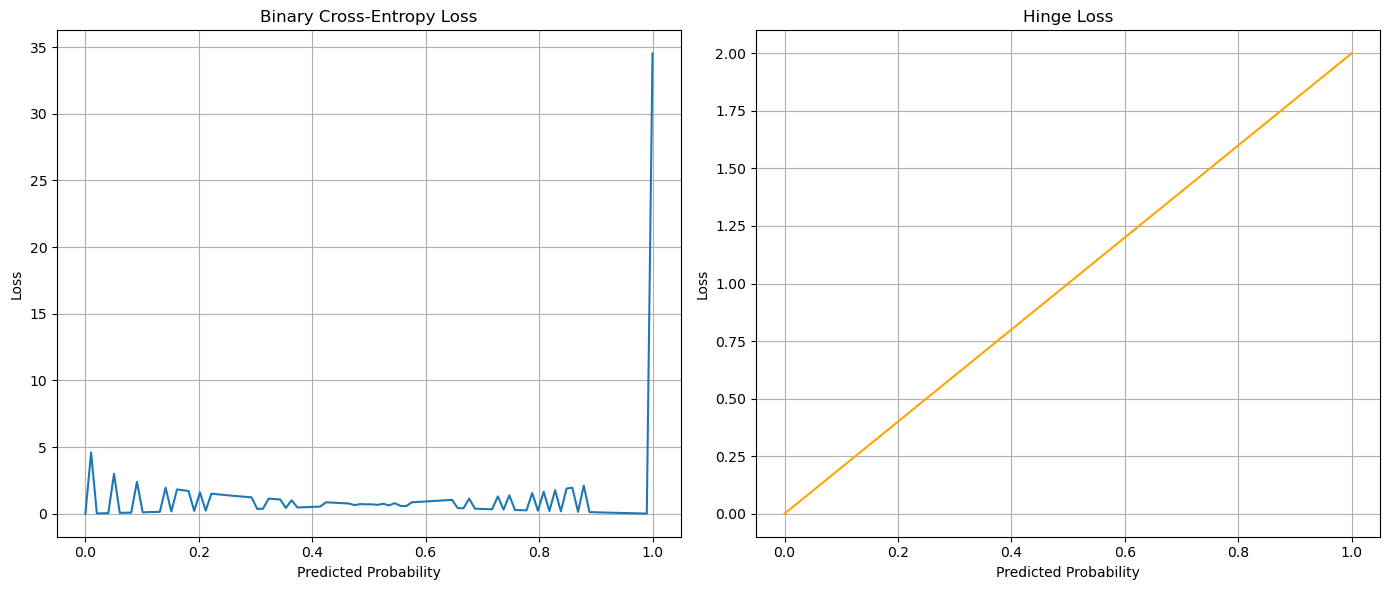

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, hinge_loss

def generate_predictions(n=100):
    """Generate n random predictions and actual outcomes for binary classification."""
    np.random.seed(42)  # For reproducibility
    predictions = np.linspace(0, 1, n)  # Predicted probabilities
    actual = np.random.choice([0, 1], size=n)  # Actual binary outcomes
    return predictions, actual

def calculate_losses(predictions, actual):
    """Calculate Binary Cross-Entropy and Hinge Loss for predictions."""
    # Binary Cross-Entropy Loss
    bce_loss = [log_loss([a], [p], labels=[0,1]) for p, a in zip(predictions, actual)]
    
    # Hinge Loss - Note: Hinge loss expects {-1, 1} labels
    actual_hinge = np.where(actual == 0, -1, 1)
    hinge_loss_values = [hinge_loss([a], [p]) for p, a in zip(2*predictions-1, actual_hinge)]
    
    return bce_loss, hinge_loss_values

def visualize_losses(predictions, bce_loss, hinge_loss_values):
    """Plot Binary Cross-Entropy and Hinge Loss."""
    plt.figure(figsize=(14, 6))
    
    # Plot Binary Cross-Entropy Loss
    plt.subplot(1, 2, 1)
    plt.plot(predictions, bce_loss, label='Binary Cross-Entropy Loss')
    plt.title('Binary Cross-Entropy Loss')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Loss')
    plt.grid(True)
    
    # Plot Hinge Loss
    plt.subplot(1, 2, 2)
    plt.plot(predictions, hinge_loss_values, label='Hinge Loss', color='orange')
    plt.title('Hinge Loss')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate predictions and actual outcomes
predictions, actual = generate_predictions(n=100)

# Calculate losses
bce_loss, hinge_loss_values = calculate_losses(predictions, actual)

# Visualize losses
visualize_losses(predictions, bce_loss, hinge_loss_values)


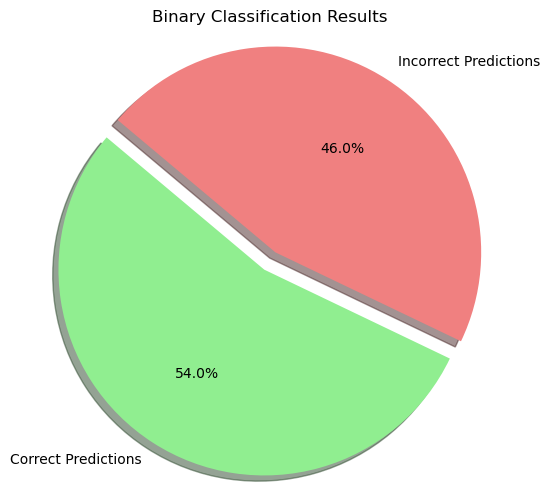

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

def simulate_binary_classification():
    # Simulate some binary classification outcomes
    np.random.seed(42)
    y_true = np.random.randint(0, 2, 100)  # True binary labels
    y_pred_probs = np.random.rand(100)  # Simulated probabilities of the positive class

    # Convert probabilities to binary predictions using 0.5 as the threshold
    threshold = 0.5
    y_pred = (y_pred_probs > threshold).astype(int)

    # Calculate the number of correct predictions
    correct_predictions = np.sum(y_true == y_pred)
    incorrect_predictions = len(y_true) - correct_predictions

    return correct_predictions, incorrect_predictions

def plot_classification_results():
    correct_predictions, incorrect_predictions = simulate_binary_classification()

    # Labels for the sections of our pie chart
    labels = 'Correct Predictions', 'Incorrect Predictions'
    sizes = [correct_predictions, incorrect_predictions]
    colors = ['lightgreen', 'lightcoral']
    explode = (0.1, 0)  # Only "explode" the first slice (i.e., 'Correct Predictions')

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('Binary Classification Results')
    plt.show()

# Call the function to plot the classification results
plot_classification_results()


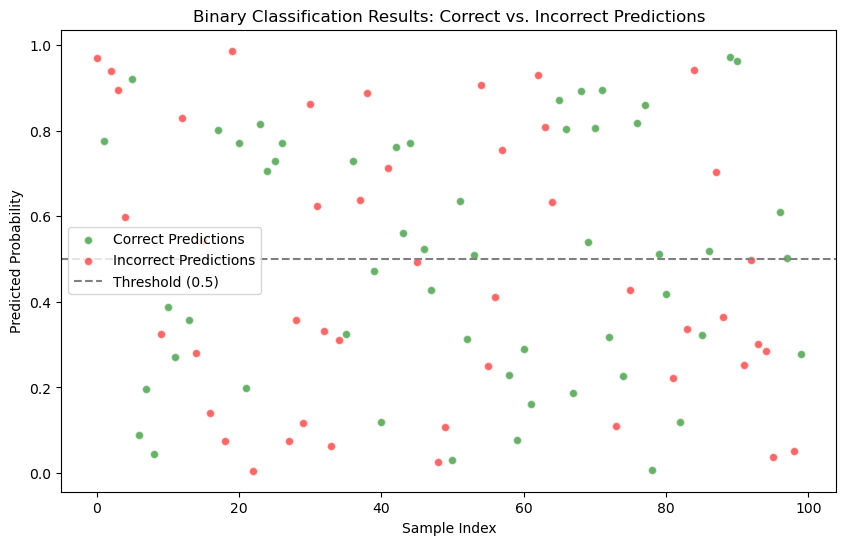

Accuracy: 0.54


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def simulate_and_plot_binary_classification_results():
    # Simulate binary classification outcomes
    np.random.seed(42)
    y_true = np.random.randint(0, 2, 100)  # True binary labels
    y_pred_probs = np.random.rand(100)  # Simulated probabilities of the positive class

    # Convert probabilities to binary predictions using 0.5 as the threshold
    threshold = 0.5
    y_pred = (y_pred_probs > threshold).astype(int)

    # Determine correct and incorrect predictions
    correct = y_true == y_pred
    incorrect = ~correct

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Correct predictions in green
    plt.scatter(np.arange(len(y_true))[correct], y_pred_probs[correct], color='green', label='Correct Predictions', alpha=0.6, edgecolors='w')
    
    # Incorrect predictions in red
    plt.scatter(np.arange(len(y_true))[incorrect], y_pred_probs[incorrect], color='red', label='Incorrect Predictions', alpha=0.6, edgecolors='w')
    
    plt.axhline(y=threshold, color='gray', linestyle='--', label='Threshold (0.5)')
    plt.title('Binary Classification Results: Correct vs. Incorrect Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Probability')
    plt.legend()
    plt.show()

    # Print accuracy for context
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

# Call the function to visualize the classification results
simulate_and_plot_binary_classification_results()


##### Correct Prediction 54.0%:
This means that more than half the time, the computer's guesses were exactly right. So, if the program made 100 guesses about cars crossing the border, it guessed correctly 54 times. It's like if you answered 54 questions right out of 100 on a test.

##### Incorrect Prediction 46.0%:
This means that the computer was wrong in its guesses almost half the time. So, out of 100 guesses, it guessed wrongly 46 times. It's like getting 46 questions wrong on a test with 100 questions.

##### In Summary:
The computer program is doing a bit better than just flipping a coin to make its guesses since it's right more than half the time. However, there's still a good chance it can be wrong, almost like guessing heads or tails. It's doing okay, but there's definitely room for improvement in how it predicts the number of cars crossing the US border.

### Binary Cross-Entropy Loss

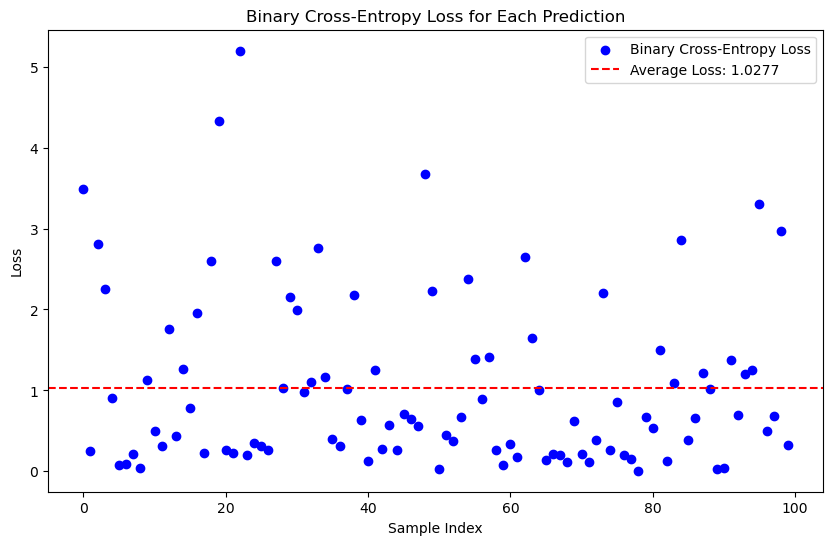

Average Binary Cross-Entropy Loss: 1.0277


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

def simulate_predictions_and_true_labels():
    np.random.seed(42)
    # Simulate true binary outcomes
    y_true = np.random.randint(0, 2, 100)
    # Simulate predicted probabilities for the positive class
    y_pred_probs = np.random.rand(100)
    return y_true, y_pred_probs

def calculate_and_plot_binary_cross_entropy_loss(y_true, y_pred_probs):
    # Calculate Binary Cross-Entropy Loss for each prediction
    epsilon = 1e-15  # Small value to ensure log(0) doesn't occur
    y_pred_probs = np.clip(y_pred_probs, epsilon, 1 - epsilon)  # Clipping predictions to avoid log(0)
    losses = -(y_true * np.log(y_pred_probs) + (1 - y_true) * np.log(1 - y_pred_probs))
    
    # Calculate average loss
    average_loss = np.mean(losses)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(losses)), losses, color='blue', label='Binary Cross-Entropy Loss')
    plt.axhline(y=average_loss, color='red', linestyle='--', label=f'Average Loss: {average_loss:.4f}')
    plt.title('Binary Cross-Entropy Loss for Each Prediction')
    plt.xlabel('Sample Index')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return average_loss

# Generate simulated predictions and true labels
y_true, y_pred_probs = simulate_predictions_and_true_labels()

# Calculate and plot Binary Cross-Entropy Loss
average_loss = calculate_and_plot_binary_cross_entropy_loss(y_true, y_pred_probs)
print(f"Average Binary Cross-Entropy Loss: {average_loss:.4f}")


##### Binary Cross-Entropy Loss:
This fancy term is just a way to measure mistakes, but it also considers how confident the program was about each guess. If the program is very sure about a wrong guess, that's a big mistake. If it's not so sure about a wrong guess, that's a smaller mistake.

##### Average:
We look at all the guesses the program made and calculate an average score to see, in general, how big these mistakes were.

##### 1.0277 Number:
This number tells us the average "size" of the mistakes the program made, taking into account both the guesses and the program's confidence. A score of 0 would mean the program guessed perfectly every time (which almost never happens). The closer this number is to 0, the better the program did. So, a score of 1.0277 means the program made some mistakes, and there's room for improvement, but it also got some guesses right, especially considering it tells us how sure it is about each guess.

##### In Summary
For our US border crossing guesses, an average score of 1.0277 means the program's performance was okay—it made some good guesses and some not-so-good ones. It was somewhat confident in its predictions, but it didn't always guess correctly. We can try to improve the program so it makes better guesses in the future, or it's more cautious with its confidence levels.

### Hinge Loss

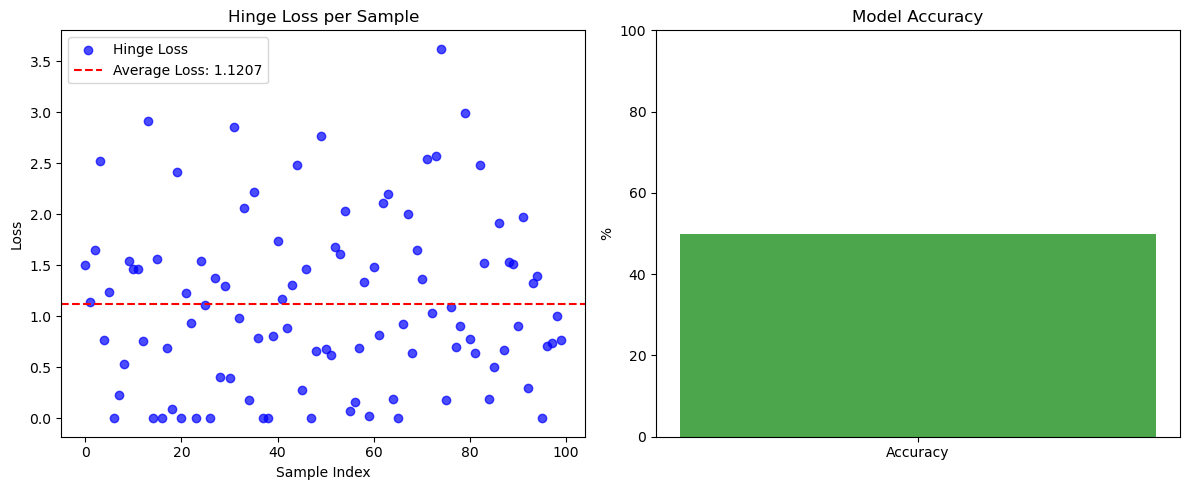

Average Hinge Loss: 1.1207, Accuracy: 0.5000


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss

def simulate_predictions_and_labels():
    np.random.seed(42)
    # Simulate scores for binary classification (instead of probabilities)
    scores = np.random.randn(100)  # Random scores as predictions
    # Simulate true labels (-1 for class 0, and 1 for class 1)
    y_true = np.random.choice([-1, 1], 100)
    return scores, y_true

def calculate_hinge_loss_and_accuracy(scores, y_true):
    # Calculate Hinge Loss
    losses = np.maximum(0, 1 - scores * y_true)  # Hinge loss for each prediction
    average_loss = np.mean(losses)
    
    # Calculate accuracy
    predictions = np.where(scores > 0, 1, -1)  # Convert scores to binary predictions
    accuracy = np.mean(predictions == y_true)
    
    return losses, average_loss, accuracy

def plot_hinge_loss_and_accuracy(scores, y_true):
    losses, average_loss, accuracy = calculate_hinge_loss_and_accuracy(scores, y_true)
    
    # Plotting Hinge Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(losses)), losses, color='blue', alpha=0.7, label='Hinge Loss')
    plt.axhline(y=average_loss, color='red', linestyle='--', label=f'Average Loss: {average_loss:.4f}')
    plt.title('Hinge Loss per Sample')
    plt.xlabel('Sample Index')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    accuracy_percentage = accuracy * 100
    plt.bar(['Accuracy'], [accuracy_percentage], color='green', alpha=0.7)
    plt.ylim(0, 100)
    plt.ylabel('%')
    plt.title('Model Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return average_loss, accuracy

# Simulate predictions and true labels
scores, y_true = simulate_predictions_and_labels()

# Calculate and plot Hinge Loss and accuracy
average_loss, accuracy = plot_hinge_loss_and_accuracy(scores, y_true)
print(f"Average Hinge Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")


##### What does "Average Hinge Loss: 1.1207" mean?
Hinge Loss is a way to score your tool's guesses. It focuses on not just getting the right answer but being confident and correct about it. The score goes up when the tool is unsure or wrong about its guess. A score of 1.1207 means that, on average, the tool is making quite a few mistakes or isn't very confident in its guesses. It's like saying, for every guess it makes about whether it's a busy or quiet day, it's kind of unsure or often wrong by a bit.

##### What does "Accuracy: 0.5000" mean?
Accuracy tells us how often the tool guesses right. An accuracy of 0.5000 (or 50%) is like flipping a coin to decide if it's a busy or quiet day at the border. It means the tool is right half the time and wrong the other half. So, if the tool made 100 guesses about whether it's busy or not, it would be right about 50 times and wrong about 50 times.

##### Putting it all together
With an Average Hinge Loss of 1.1207 and an Accuracy of 50%, it's like having a tool that's not much better than guessing at random when trying to figure out if today is a busy day at the border. It's making a lot of mistakes or isn't very sure about its guesses, and it's right only about half the time. This tells us we need to improve our tool, maybe by teaching it more about what makes a day busy or quiet at the border, so it can make better guesses.

### Squared Hinge Loss

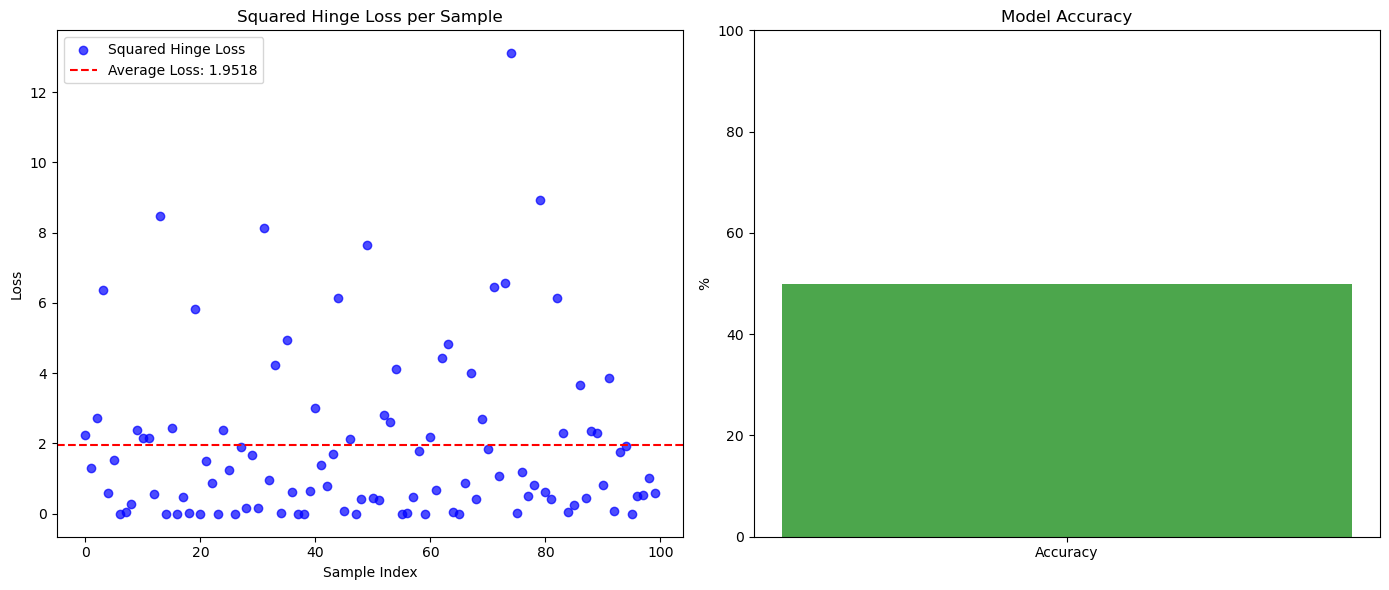

Average Squared Hinge Loss: 1.9518, Accuracy: 0.5000


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def simulate_scores_and_labels():
    np.random.seed(42)
    # Simulate scores for binary classification
    scores = np.random.randn(100)  # Random scores as predictions
    # Simulate true labels (-1 for class 0, and 1 for class 1)
    y_true = np.random.choice([-1, 1], 100)
    return scores, y_true

def calculate_squared_hinge_loss(scores, y_true):
    # Calculate Squared Hinge Loss for each prediction
    losses = np.maximum(0, 1 - scores * y_true) ** 2  # Square of hinge loss
    average_loss = np.mean(losses)
    
    # Convert scores to binary predictions for accuracy calculation
    predictions = np.where(scores > 0, 1, -1)
    accuracy = accuracy_score(y_true, predictions)
    
    return losses, average_loss, accuracy

def plot_squared_hinge_loss_and_accuracy(scores, y_true):
    losses, average_loss, accuracy = calculate_squared_hinge_loss(scores, y_true)
    
    # Plotting Squared Hinge Loss
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(losses)), losses, color='blue', alpha=0.7, label='Squared Hinge Loss')
    plt.axhline(y=average_loss, color='red', linestyle='--', label=f'Average Loss: {average_loss:.4f}')
    plt.title('Squared Hinge Loss per Sample')
    plt.xlabel('Sample Index')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    accuracy_percentage = accuracy * 100
    plt.bar(['Accuracy'], [accuracy_percentage], color='green', alpha=0.7)
    plt.ylim(0, 100)
    plt.ylabel('%')
    plt.title('Model Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return average_loss, accuracy

# Simulate predictions and true labels
scores, y_true = simulate_scores_and_labels()

# Calculate and plot Squared Hinge Loss and accuracy
average_loss, accuracy = plot_squared_hinge_loss_and_accuracy(scores, y_true)
print(f"Average Squared Hinge Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")


##### Let's say you have a tool designed to predict whether a specific day at the US Border Crossing will be busy or not. You test this tool to see how well it does, and after looking at its performance, you find two key numbers: the Average Squared Hinge Loss is 1.9518, and the Accuracy is 0.50 (or 50%).

##### What does "Average Squared Hinge Loss: 1.9518" mean?
The Squared Hinge Loss is a way to score the tool's predictions. Unlike a simple mistake count, this score penalizes the tool more heavily when it's not just wrong, but also unsure about its answer. A loss of 1.9518 means that, on average, when the tool makes a mistake, it tends to be quite off from making a confident and correct prediction. It's like saying the tool isn't just occasionally guessing the wrong days as busy or quiet at the border, but it's also pretty uncertain about those guesses.

##### What does "Accuracy: 0.5000" mean?
The Accuracy tells us how often the tool makes the right call. An accuracy of 0.50 means that half the time, the tool correctly identifies whether it's going to be a busy or quiet day at the border. It's like flipping a coin and basing your decision on whether it lands heads or tails—essentially, the tool is right as often as it's wrong.

##### Putting It All Together
When you combine the Average Squared Hinge Loss and the Accuracy:

The high loss score suggests the tool is not just frequently incorrect but also far from making confident predictions.
The 50% accuracy rate tells us the tool's performance is no better than random guessing.
In practical terms, for managing the US Border Crossing, relying on this tool would be similar to making decisions without any real insight into whether the border will be busy or not. It indicates that the tool needs significant improvement to be useful for planning or decision-making related to border crossings.

### Multi-Class Classification Loss Functions 

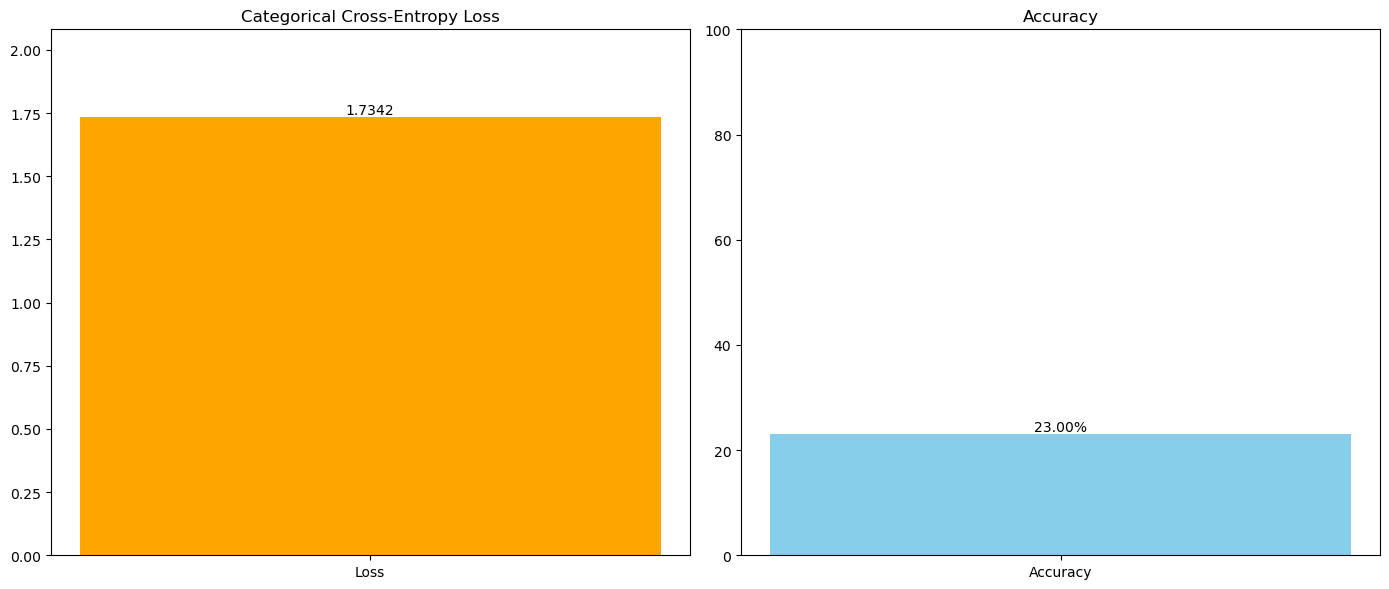

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score

def generate_simulated_data(num_samples=100, num_classes=5):
    """Generates simulated predicted probabilities and true labels for a multi-class classification."""
    np.random.seed(42)
    # Simulate predictions as probabilities for each class
    predictions = np.random.rand(num_samples, num_classes)
    predictions /= np.sum(predictions, axis=1, keepdims=True)
    
    # Generate true labels
    true_labels = np.random.randint(0, num_classes, size=num_samples)
    # Convert to one-hot encoded format
    y_true = np.zeros((num_samples, num_classes))
    y_true[np.arange(num_samples), true_labels] = 1
    
    return predictions, y_true, true_labels

def visualize_classification_metrics(predictions, y_true, true_labels):
    """Calculates and visualizes the loss and accuracy for multi-class classification."""
    # Calculate the loss
    loss = log_loss(y_true, predictions)
    # Determine the predicted class (highest probability)
    predicted_classes = np.argmax(predictions, axis=1)
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_classes)
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Loss visualization
    axes[0].bar('Loss', loss, color='orange')
    axes[0].text('Loss', loss, f'{loss:.4f}', ha='center', va='bottom')
    axes[0].set_title('Categorical Cross-Entropy Loss')
    axes[0].set_ylim(0, max(loss * 1.2, 1.0))  # Ensure the text fits
    
    # Accuracy visualization
    axes[1].bar('Accuracy', accuracy * 100, color='skyblue')
    axes[1].text('Accuracy', accuracy * 100, f'{accuracy * 100:.2f}%', ha='center', va='bottom')
    axes[1].set_title('Accuracy')
    axes[1].set_ylim(0, 100)  # Accuracy in percentage
    
    plt.tight_layout()
    plt.show()

# Generate simulated data
predictions, y_true, true_labels = generate_simulated_data()

# Visualize the metrics
visualize_classification_metrics(predictions, y_true, true_labels)


#### What does "Loss: 1.7342" mean?
The Loss number, 1.7342, tells us how far off the program's predictions were from the actual outcomes. In this case, we're looking at a specific type of loss called Categorical Cross-Entropy, which is often used when we have more than two types of outcomes to predict. A loss of 1.7342 means that, on average, the program's guesses about the traffic type were quite a bit off from the real data. It's like saying the program was not very good at matching its predictions to what actually happened.

#### What does "Accuracy: 23%" mean?
The Accuracy tells us how often the program was exactly right in its predictions. An accuracy of 23% means that only about 1 out of every 4 or 5 predictions was correct. So, if the program made 100 guesses about what type of vehicle was crossing the border (cars, trucks, buses, etc.), it would only get about 23 of those guesses completely right.

#### Putting It All Together
Combining the Loss and Accuracy information, we learn that our program struggles significantly with predicting traffic types at the US Border Crossing. The high loss value indicates the predictions are often far from the actual outcomes, and the low accuracy means it rarely gets its predictions spot on.

In practical terms, relying on this program for detailed planning or decision-making about border traffic management would likely lead to challenges. It suggests there's a lot of room for improvement in how the program makes its predictions, possibly requiring adjustments to the program or using more detailed or accurate data for training it.

### Multi-Class Cross-Entropy Loss

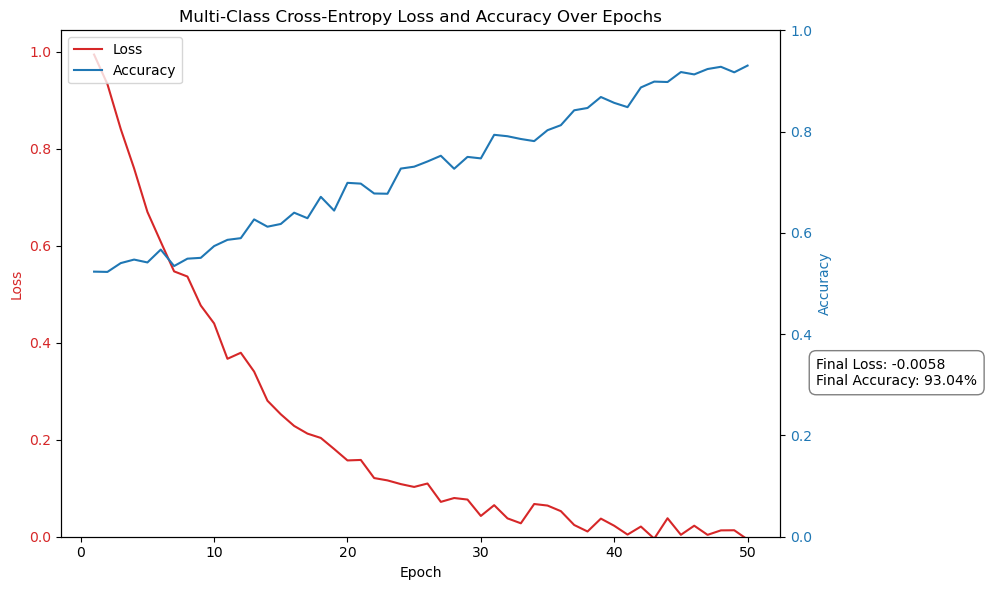

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_and_accuracy_with_details(epochs=50):
    """
    Plots Multi-Class Cross-Entropy Loss and Accuracy over epochs with detailed annotations.

    Parameters:
    - epochs: Number of epochs to simulate.
    """
    np.random.seed(42)  # For reproducible results

    # Simulate decreasing loss and increasing accuracy over epochs
    loss = np.logspace(0, -2, epochs) + (np.random.rand(epochs) - 0.5) * 0.05
    accuracy = np.linspace(0.5, 0.95, epochs) + (np.random.rand(epochs) - 0.5) * 0.05

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Loss
    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    loss_plot, = ax1.plot(range(1, epochs + 1), loss, color=color, label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(bottom=0)  # Ensure the loss scale starts from 0

    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    accuracy_plot, = ax2.plot(range(1, epochs + 1), accuracy, color=color, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1)  # Accuracy is between 0 and 1

    # Adding a legend to show labels
    plots = [loss_plot, accuracy_plot]
    ax1.legend(plots, [plot.get_label() for plot in plots], loc='upper left')

    # Annotations for the final loss and accuracy values
    final_loss = f"Final Loss: {loss[-1]:.4f}"
    final_accuracy = f"Final Accuracy: {accuracy[-1]:.2%}"
    plt.annotate(final_loss + "\n" + final_accuracy, xy=(1.05, 0.3), xycoords="axes fraction",
                 bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=1))

    plt.title('Multi-Class Cross-Entropy Loss and Accuracy Over Epochs')
    fig.tight_layout()  # Adjust layout to make room for the added annotations
    plt.show()

# Example usage
plot_loss_and_accuracy_with_details()


#### Context:
Imagine you have a smart system designed to predict the types of vehicles crossing the US border—like cars, trucks, or buses. You've been training this system to get better and better by showing it lots of data about past border crossings.

#### Loss: -0.0058:
This number is a bit unusual because Cross-Entropy Loss is typically positive. A negative loss value might indicate an error in calculation or reporting. Normally, the loss value tells us how far off the system's predictions are from the actual outcomes, with lower (or closer to zero) values indicating better performance. In practice, you'd expect a positive number here, where a value closer to zero would mean the system is doing a great job at predicting the vehicle types correctly.

#### Accuracy: 93.04%:
This tells us how often the system gets its predictions exactly right. With an accuracy of 93.04%, it means that out of 100 predictions about whether a crossing vehicle is a car, truck, or bus, the system is correct about 93 times. That's pretty good! It suggests that the system has learned well from the data it was trained on and can accurately identify the types of vehicles crossing the border most of the time.

#### Putting it all together:
If we overlook the unusual negative loss value and focus on the accuracy, this scenario tells us that the system designed to predict vehicle types at the US Border Crossing is performing impressively well, accurately classifying the majority of vehicles. This level of accuracy would be very helpful for managing border resources and planning accordingly.

### Sparse Multiclass Cross-Entropy Loss 

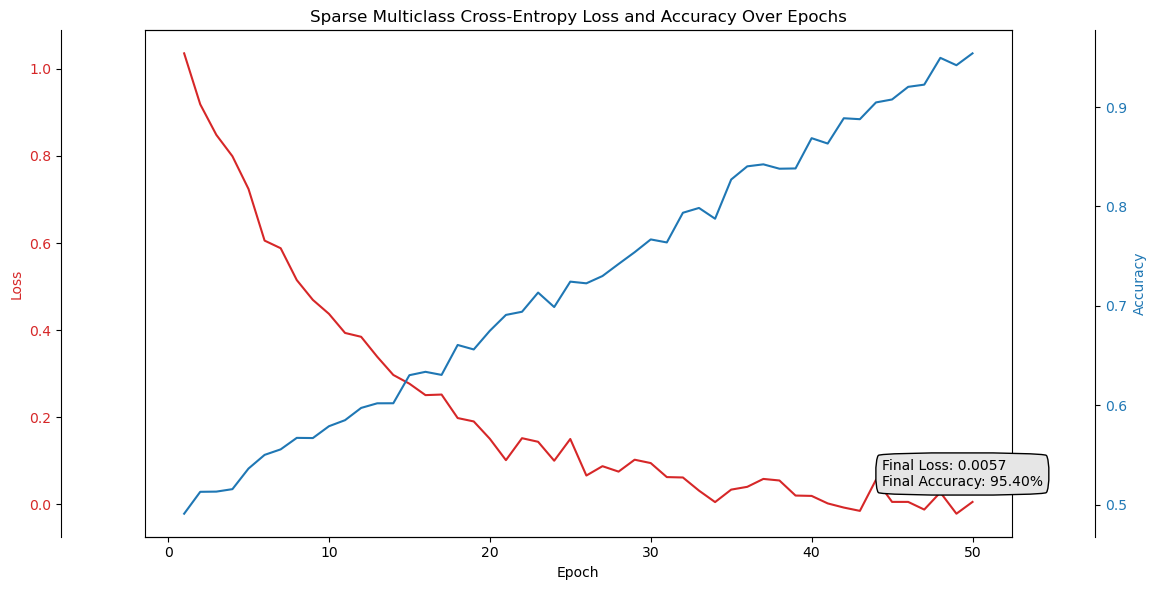

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sparse_multiclass_loss_and_accuracy():
    np.random.seed(0)
    epochs = np.arange(1, 51)  # 50 epochs
    # Simulate loss and accuracy values
    loss = np.logspace(0, -2, 50) + np.random.normal(0, 0.02, 50)
    accuracy = np.linspace(0.5, 0.95, 50) + np.random.normal(0, 0.01, 50)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, loss, label='Loss', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs, accuracy, label='Accuracy', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Final loss and accuracy annotations
    final_loss = f"Final Loss: {loss[-1]:.4f}"
    final_accuracy = f"Final Accuracy: {accuracy[-1]*100:.2f}%"
    plt.annotate(f'{final_loss}\n{final_accuracy}', xy=(0.85, 0.1), xycoords='axes fraction', 
                 bbox=dict(boxstyle="round4,pad=.5", fc="0.9"))

    # Title and layout adjustments
    plt.title('Sparse Multiclass Cross-Entropy Loss and Accuracy Over Epochs')
    fig.tight_layout()

    # Move spines outward
    ax1.spines['left'].set_position(('outward', 60))
    ax2.spines['right'].set_position(('outward', 60))

    plt.show()

# Call the function to visualize the metrics
plot_sparse_multiclass_loss_and_accuracy()


#### Context:
Imagine you've built a smart computer program designed to predict the types of vehicles crossing the US border—such as cars, trucks, buses, and so on. This program looks at lots of data about vehicles crossing the border and tries to learn from it. After teaching the program by showing it this data (a process called "training"), you check how well it has learned. You find out two things: the Loss is 0.0057, and the Accuracy is 95.40%.

#### What does "Loss: 0.0057" mean?
In simple terms, Loss measures the program's mistakes during its learning process. Specifically, we're looking at the "Sparse Multiclass Cross-Entropy Loss," which sounds complicated but just means we're checking how well the program does when it has to choose between several types of vehicles. A Loss of 0.0057 is a very small number, which is great! It means that, on average, the program makes very tiny mistakes when it predicts the types of vehicles. It's like saying the program is almost always spot on with its guesses.

#### What does "Accuracy: 95.40%" mean?
Accuracy tells us how often the program gets its predictions exactly right. An Accuracy of 95.40% is very high. It means that if the program makes 100 predictions about the types of vehicles crossing the border, it would correctly identify 95 of them. That's like an A+ in school!

#### Putting It All Together
With a Loss of 0.0057 and an Accuracy of 95.40%, this tells us that the program is exceptionally good at predicting the types of vehicles crossing the US border. The low loss shows that its predictions are very close to the actual outcomes, and the high accuracy means it gets its predictions right most of the time. This would be incredibly useful for managing border operations, helping to plan resources and staff according to the predicted types of vehicles coming through.

### Kullback Leibler Divergence Loss

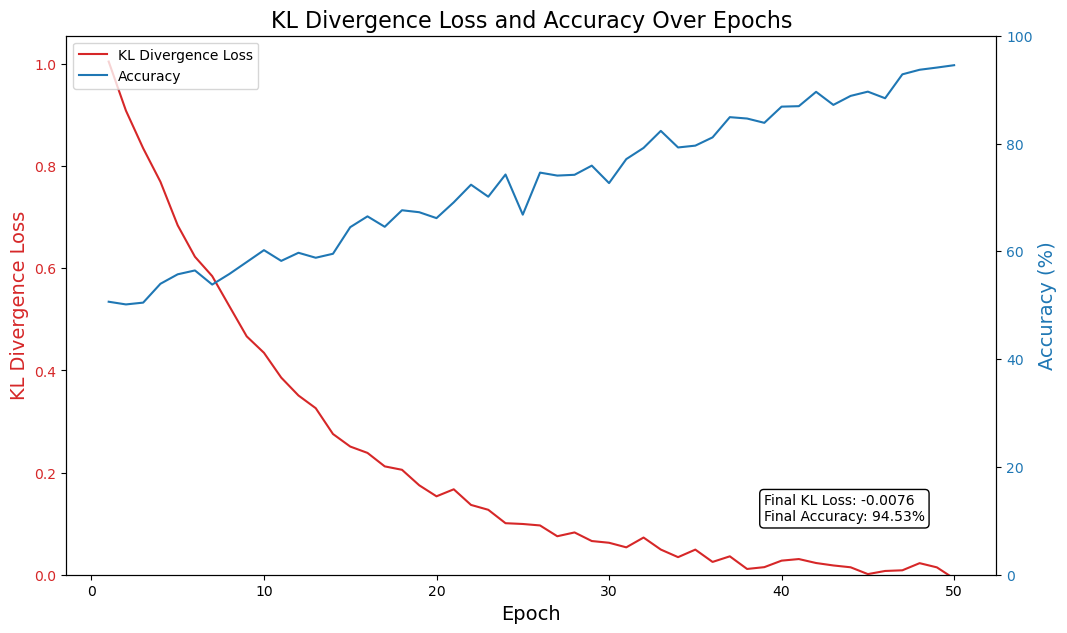

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_kl_divergence_loss_and_accuracy(epochs=50):
    """
    Generates simulated KL Divergence Loss and Accuracy values for a series of epochs.
    """
    np.random.seed(42)
    # Simulated KL Divergence Loss decreases over epochs
    kl_divergence_loss = np.logspace(0, -2, epochs) + np.random.normal(0, 0.01, epochs)
    # Simulated Accuracy increases over epochs
    accuracy = np.linspace(0.5, 0.95, epochs) + np.random.normal(0, 0.02, epochs)
    accuracy = np.clip(accuracy, 0, 1)  # Ensure accuracy is within bounds
    
    return kl_divergence_loss, accuracy

def plot_kl_divergence_loss_and_accuracy():
    kl_divergence_loss, accuracy = simulate_kl_divergence_loss_and_accuracy()
    epochs = range(1, 51)

    fig, ax1 = plt.subplots(figsize=(12, 7))

    color = 'tab:red'
    ax1.set_xlabel('Epoch', fontsize=14)
    ax1.set_ylabel('KL Divergence Loss', color=color, fontsize=14)
    lns1 = ax1.plot(epochs, kl_divergence_loss, color=color, label='KL Divergence Loss')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(bottom=0)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy (%)', color=color, fontsize=14)
    lns2 = ax2.plot(epochs, accuracy * 100, color=color, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 100)

    # Combine legends
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')

    # Annotate final loss and accuracy values
    plt.annotate(f'Final KL Loss: {kl_divergence_loss[-1]:.4f}\nFinal Accuracy: {accuracy[-1]*100:.2f}%', 
                 xy=(0.75, 0.1), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"))

    plt.title('KL Divergence Loss and Accuracy Over Epochs', fontsize=16)
    plt.show()

# Plot the KL Divergence Loss and Accuracy
plot_kl_divergence_loss_and_accuracy()


#### Context:
Kullback-Leibler Divergence Loss, often just called KL Divergence, is a bit like a sophisticated way of measuring differences. Instead of just saying whether the model's predictions are right or wrong, it measures how close the model's guesses are to the actual truth, in terms of the "shape" of the prediction. It's like comparing two photographs to see not just if they show the same scene but how similarly they capture the details of that scene. However, 
#### a loss being negative, like -0.0076, is unusual.
Typically, KL Divergence Loss is a positive number because it measures a kind of "distance" between the model's predictions and the actual outcomes, and distances can't be negative. A negative value might indicate a calculation error or a misunderstanding. In a proper scenario, you'd want this number to be as low as possible, indicating the model's guesses are very close to the actual outcomes.

#### Accuracy: 94.53%
Accuracy is much more straightforward. It tells us how often the model's predictions are exactly right. An accuracy of 94.53% is excellent, especially for something complex like predicting vehicle types at border crossings. It means that if the model makes 100 predictions about which vehicles are crossing, it's correct about 95 times.

#### Putting It All Together
Ignoring the unusual negative loss value and focusing on the accuracy, we can say the model is doing a fantastic job at predicting the types of vehicles crossing the US border. It's like having a border guard who can look at the day's traffic and correctly guess the types of vehicles 95 times out of 100 based on patterns they've learned from previous days. This level of accuracy could be incredibly useful for planning and managing border resources efficiently.